# Illustration de la progressivité de l'impôt sur le revenu

## Initialisation

Nous importons les modules nécéssaires et initialisons le système socio-fiscal.


In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
from datetime import date  # module nécessaire pour la définition des dates, dont notamment les dates de naissances
import openfisca_france    # module décrivant le système socio-fiscal français

TaxBenefitSystem = openfisca_france.init_country()  # Initialisation de la classe décrivant le système socio-fiscal français
tax_benefit_system = TaxBenefitSystem()  # Création d'une instance du système socio-fiscal français 

## Concavité de l'impôt

In [1]:
simulation = tax_benefit_system.new_scenario().init_single_entity(
    axes = [
        dict(
            count = 100,
            min = 0,
            max = 50000,
            name = 'sal',
            ),
        ],
    period = 2014,
    parent1 = dict(
        birth = date(1980, 1, 1),
        salbrut = 24000,
    )
    ).new_simulation(debug = True)

NameError: name 'tax_benefit_system' is not defined

In [4]:
salaire_imposable = simulation.calculate('sal')
impot = - simulation.calculate('impo')

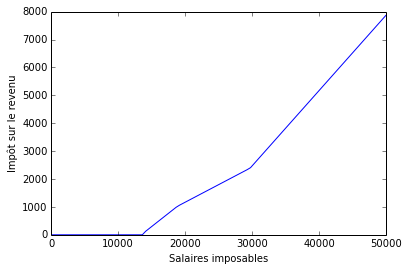

In [5]:
plt.plot(salaire_imposable, impot)
plt.ylabel(u"Impôt sur le revenu")
plt.xlabel(u"Salaires imposables")

L'impôt payé est continu: il n'augmente brusquement son impôt lorsque l'on change de tranche contrairement 
à ce que pensent beaucoup de personnes.

## Taux moyen

In [6]:
taux_moyen = impot / salaire_imposable  

-c:1: RuntimeWarning: invalid value encountered in divide


In [7]:
taux_moyen = impot / (salaire_imposable * (salaire_imposable != 0) + (salaire_imposable == 0) )  

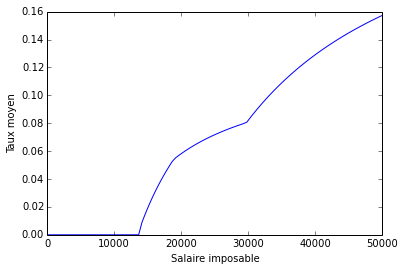

In [8]:
plt.plot(salaire_imposable, taux_moyen)
plt.ylabel("Taux moyen")
plt.xlabel("Salaire imposable")

## Taux marginal

In [9]:
taux_marginal =  (impot[:-1] - impot[1:]) / (salaire_imposable[:-1] - salaire_imposable[1:] ) 

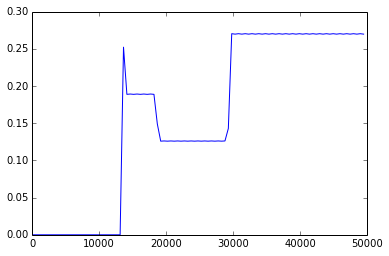

In [10]:
plt.plot(salaire_imposable[:-1], taux_marginal)

In [11]:
taux_marginal[40], taux_marginal[95]

(0.12586287, 0.27029982)

On retrouve les atux marginaux des tranches à 14% et à 30% (il ne faut pas oublier l'abattement de 10% pour frais professionnels)

### Remarque: utilisation de fonction dédiées

Il est possible d'utiliser des fonctions dédiées au calcul des taux marginaux et des taux moyens payés sur certaines concept de revenus. On reproduit ci-dessous 

In [12]:
from openfisca_core.rates import average_rate, marginal_rate

In [13]:
revenu_apres_impot = simulation.calculate('revenu_net_individu') + simulation.calculate('impo') 

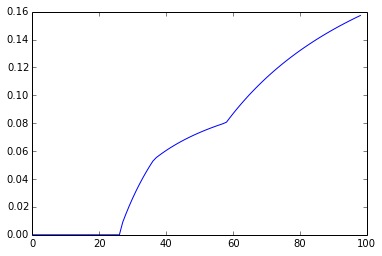

In [14]:
plt.plot(average_rate(revenu_apres_impot[1:], salaire_imposable[1:]))

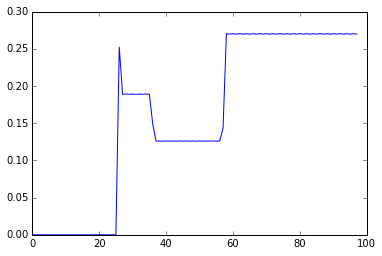

In [15]:
plt.plot(marginal_rate(revenu_apres_impot[1:], salaire_imposable[1:]))

Exercice: montrer que le taux moyen tend vers le taux marginal à l'infini